In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
import requests

url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv"
response = requests.get(url)

# Save the file
with open("laptops.csv", "wb") as file:
    file.write(response.content)

In [21]:
df = pd.read_csv("laptops.csv")
df.shape

(2160, 12)

In [22]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(2)

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.0
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.0


In [29]:
obj_columns = list(df.dtypes[df.dtypes == 'object'].index)
obj_columns

['laptop', 'status', 'brand', 'model', 'cpu', 'storage_type', 'gpu', 'touch']

In [30]:
for col in obj_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df.head(2)

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.0
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.0


<Axes: xlabel='final_price', ylabel='Count'>

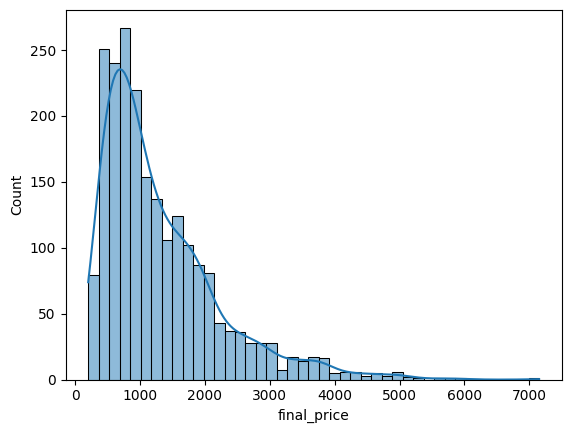

In [36]:
sns.histplot(df.final_price, kde = True)

<Axes: xlabel='final_price', ylabel='Count'>

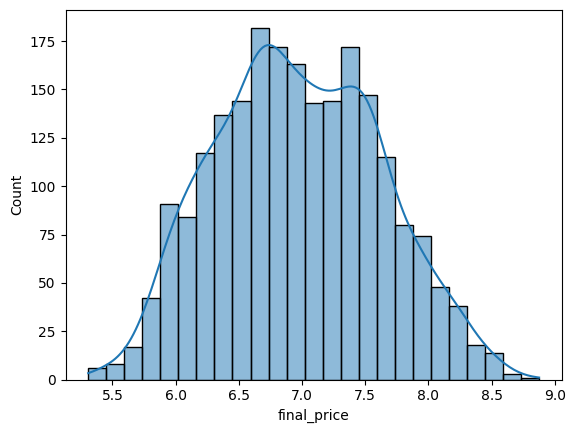

In [35]:
log_price = np.log1p(df.final_price)
sns.histplot(log_price, kde = True)

### Question 1

In [39]:
df = df[['ram', 'storage', 'screen', 'final_price']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ram          2160 non-null   int64  
 1   storage      2160 non-null   int64  
 2   screen       2156 non-null   float64
 3   final_price  2160 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 67.6 KB


In [40]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

### Question 2

In [16]:
df.ram.describe()

count    2160.000000
mean       15.413889
std         9.867815
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64

### Question 3

In [162]:
def train_val_test_split(df, val_proportion = .2, test_proportion = .2, random_seed = 42):

    n_val = int(df.shape[0] * val_proportion)
    n_test = int(df.shape[0] * test_proportion)
    n_train = df.shape[0] - n_val - n_test

    idx = np.arange(df.shape[0])
    np.random.seed(random_seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train : n_train+n_val]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

    # y_train, X_train = np.log1p(df_train.final_price), df_train.drop(['final_price'], axis=1)
    # y_val, X_val = np.log1p(df_val.final_price), df_val.drop(['final_price'], axis=1)
    # y_test, X_test = np.log1p(df_test.final_price), df_test.drop(['final_price'], axis=1)

    y_train, X_train = df_train.final_price, df_train.drop(['final_price'], axis=1)
    y_val, X_val = df_val.final_price, df_val.drop(['final_price'], axis=1)
    y_test, X_test = df_test.final_price, df_test.drop(['final_price'], axis=1)

    return X_train, y_train, X_val, y_val, X_test, y_test

In [163]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res


def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [135]:
# screens filled by 0

X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(df.fillna(0), val_proportion = .2, test_proportion = .2)

In [146]:
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)
print(w0, w)
print(rmse(y_train, y_pred))

6.855538042891172 [ 0.02650249  0.00066642 -0.04534136]
0.4460859169570135


In [164]:
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(df.fillna(0), val_proportion = .2, test_proportion = .2)
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

597.36

In [165]:
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(df.fillna(df.screen.mean()), val_proportion = .2, test_proportion = .2)
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

600.27

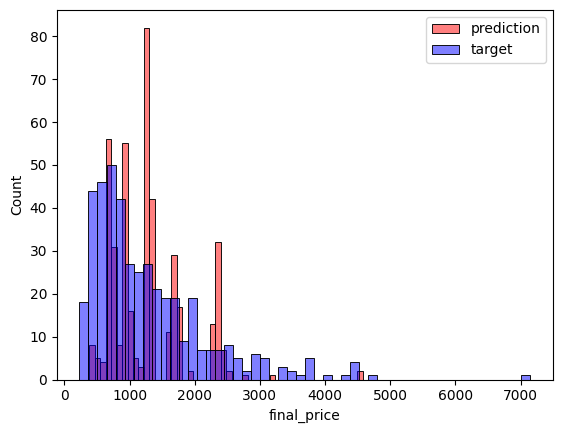

In [166]:
sns.histplot(y_pred, color='red', label='prediction', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', label='target', alpha=0.5, bins=50)
plt.legend()
plt.show()

### Question 4

In [167]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [169]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    print('*****************************\nr = ', r, end = '  \t')
    X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(df.fillna(0), val_proportion = .2, test_proportion = .2)
    w0, w = train_linear_regression_reg(X_train, y_train, r = r)
    y_pred = w0 + X_val.dot(w)
    print('rmse = ', round(rmse(y_val, y_pred), 2))


*****************************
r =  0  	rmse =  597.36
*****************************
r =  0.01  	rmse =  597.36
*****************************
r =  0.1  	rmse =  597.35
*****************************
r =  1  	rmse =  597.21
*****************************
r =  5  	rmse =  597.01
*****************************
r =  10  	rmse =  597.06
*****************************
r =  100  	rmse =  597.9


### Question 5

In [170]:
rmses = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    print('*****************************\nseed = ', seed, end = '\t')

    X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(df.fillna(0), val_proportion = .2, test_proportion = .2, random_seed=seed)
    w0, w = train_linear_regression(X_train, y_train)
    y_pred_val = w0 + X_val.dot(w)
    print('rmse = ', round(rmse(y_val, y_pred_val), 2))
    rmses.append(rmse(y_val, y_pred_val))

*****************************
seed =  0	rmse =  565.45
*****************************
seed =  1	rmse =  636.8
*****************************
seed =  2	rmse =  588.96
*****************************
seed =  3	rmse =  597.81
*****************************
seed =  4	rmse =  571.96
*****************************
seed =  5	rmse =  573.24
*****************************
seed =  6	rmse =  647.34
*****************************
seed =  7	rmse =  550.44
*****************************
seed =  8	rmse =  587.33
*****************************
seed =  9	rmse =  576.1


In [171]:
print('std of rmse is: ', round(np.std(np.array(rmses)),3))

std of rmse is:  29.176


### Question 6. RMSE on Test

In [176]:
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(df.fillna(0), val_proportion = .2, test_proportion = .2, random_seed=9)
X_train, y_train = pd.concat([X_train, X_val], ignore_index = True), pd.concat([y_train, y_val], ignore_index = True)

w0, w = train_linear_regression_reg(X_train, y_train, r = 0.001)
y_pred = w0 + X_test.dot(w)
print('rmse = ', round(rmse(y_test, y_pred), 2))

rmse =  608.61
